# PHAS1240 Session 5:
# Fitting data with a least-squares fit

louise.dash@ucl.ac.uk Last updated 28.10.2015


### Learning objectives
By the end of this session, you should be able to plot a data file, and calculate and plot the line of best fit using the least squares method.

## Contents
This notebook has two sections. Here are some quick links between them.

* [1. Theory](#theory)
* [2. Your task](#task)

# <a id="theory"></a>1. Theory 

Imagine that we've successfully recorded some experimental data in our lab book, and plotted it on a beautiful graph. 

Now we want to find the best possible straight line through it.  How do we go about this? Before we can implement this in Python, we need to understand the underlying maths - this is also covered in Dr Bartlett's Data Analysis lectures, so this should be a review of stuff you've already met.

A straight line has the equation

 $$y = mx + c$$

where $m$ is the slope / gradient of the line, and $c$ the intercept with the $x$-axis.

Imagine we have n pairs of data points:

$$(x_1, y_1), (x_2, y_2), (x_3, y_3), \ldots, (x_n, y_n) $$

We can plot these, and then draw a straight line through them (for the moment this isn't necessarily the best straight line, just any old straight line, this is to illustrate the principle):

<img src="./Leastsquaresfit-animline.gif" width=400>

(if you can't see the image, make sure you've also downloaded the image file(s) from Moodle and they are in the same directory as this notebook)

For each point, we can then measure the vertical distance $\Delta y$ between the data point and the line - note that some of these will be positive, and some negative. We can write this mathematically as

$$\Delta y = y_i - mx - c$$

Now, if we were to add up all these deviations to use as a measure of goodness of fit of the line, we'd have a problem, because many of the positive and negative values would cancel out. Instead, we need to find a positive number that will account for all the deviations.

We therefore take the square of each deviation and add them all up:

$$S = \sum(y_i - mx_i -c)^2$$

<img src="./LeastSquares-Squares.gif" width=400>

The best straight-line fit to our data will then be the one with the smallest value of $S$: i.e.  the one whose sum of all the squares is least.

So how do we find this best fit line? Mathematically, we can minimise $S$ with respect to our fit parameters $c$ and $m$:

$$\frac{\partial S}{\partial m} = -2 \sum x_i(y_i - mx_i - c) = 0$$

$$ \frac{\partial S}{\partial c} = -2 \sum (y_i - mx_i - c) = 0 $$

As we need to minimize both of these, we end up with two simultaneous equations:

$$ m \sum x_i ^2 + c \sum x_i = \sum x_i y_i $$

$$ m \sum x_i + n c = \sum y_i $$

(remember, $n$ is the number of data pairs in the set)

Solving these gives us

$$ m = \frac{\sum(x_i - \bar{x}) y_i}{\sum (x_i - \bar{x})^2} = \frac{\sum x_i (y_i - \bar{y})}{\sum x_i (x_i - \bar{x})} $$

$$ c = \bar{y} - m \bar{x} $$

where $ \bar{x} = \frac{1}{n} \sum x_i$ and $\bar{y} = \frac{1}{n} \sum y_i$, i.e. the mean values of the data.

## The leastsquaresfitometer

These equations can be a bit abstract - it's easier to understand if we can visualise it. To help with this, I wrote a code that lets you interactively change the parameters of a straight line to see how the squares of the residuals change. 

Move the two sliders for the slope and intercept around and you will see the straight line moving, and the size of the squares changing. The initial position of the line is close to, but not exactly, the best possible fit. Play with this, and adjust the sliders until you find the best fit - that which minimizes the sum of the areas of the squares.

In [18]:
# script in this cell is from http://blog.nextgenetics.net/?e=102
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
This cell (and the whole notebook) doesn't display the code by default, as it's the interactive plot I'd like you to play around with. 
If you do want to look at the code itself, you can toggle it on/off by clicking <a href="javascript:code_toggle()">here</a>.
(We will be looking more at how to create interactive plots after Reading week.)''')

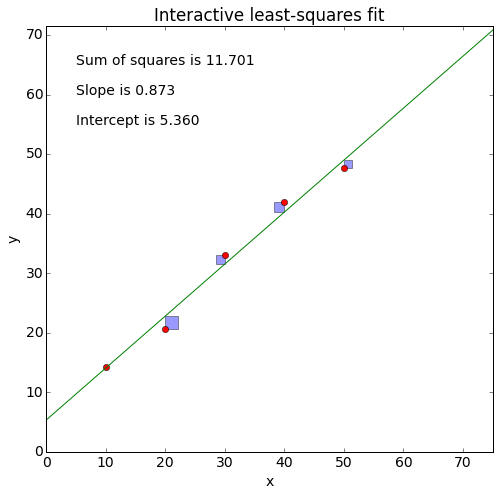

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display, HTML

%matplotlib inline

### set "data"
# For this visualization, best if slope ~ 1
# feel free to vary the values!
x = np.array([10,20,30,40,50])
y = np.array([14.3,20.68,33.1,42,47.7])


### Fit the data

mean_x = np.mean(x)
mean_y = np.mean(y)
slope = np.sum((x - mean_x)*y) / np.sum((x - mean_x)*x)
intercept = mean_y - slope*mean_x
sum_of_squares = np.sum((y - slope*x - intercept)**2)
#print "slope", slope, "intercept", intercept, "sumofsquares", sum_of_squares


# initialize, only once
# basic information from the data
x_min = np.min(x)
x_max = np.max(x)
y_min = np.min(y)
y_max = np.max(y)


### Now the main plotting function ###
def plotsquares(slope,intercept):
    '''Function that plots data and squares for a given slope and intercept'''
    fig = plt.figure(figsize=(8,8),dpi=150)
    plt.rc("font", size=14) # increase default font size
    ax = fig.add_subplot(111, aspect='equal') # need this to use add_artist

    # generate a list of x-points for the fitted line
    # straight line only needs 2 points, but we'll do more.
    x_points = np.linspace(0,x_max*2.,2)
    y_points = slope*x_points + intercept

    plt.plot(x, y, 'ro')
    plt.line, = plt.plot(x_points, y_points, 'g-') #nb use of comma
    #plt.xlim(0.8*x_min,1.1*x_max)
    #plt.ylim(0.8*y_min,1.1*y_max)
    plt.xlim(0,1.5*x_max)
    plt.ylim(0,1.5*y_max)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Interactive least-squares fit')
    
    sum_of_squares = np.sum((y - slope*x - intercept)**2)
    plt.text(5,65, "Sum of squares is {0:0.3f}".format(sum_of_squares))
    plt.text(5,60, "Slope is {0:0.3f}".format(slope))
    plt.text(5,55, "Intercept is {0:0.3f}".format(intercept))

    ###  set up the squares for the initial plot
    sqcol = '#99b267'
    patches = []
    for xx,yy in zip(x,y):
        # calculate vertical distance from datapoint to line
        dist = yy - (slope*xx + intercept)
        if slope > 0:
            if dist > 0:
                # datapoint is TOP RIGHT of the square
                posx = xx-dist
                posy = yy-dist
                wid = dist
                hei = dist
            else: # dist is negative
                # datapoint is BOTTOM LEFT of the square
                posx = xx
                posy = yy
                wid = -dist
                hei = -dist
        else: #slope is negative
            if dist > 0:
                # datapoint is TOP LEFT of the square
                posx = xx
                posy = yy - dist
                wid = dist
                hei = dist
            else: # dist is negative
                # datapoint is BOTTOM RIGHT of the square
                posx = xx+dist
                posy = yy
                wid = -dist
                hei = -dist

        square = Rectangle(xy=(posx,posy), width=wid, height=hei)
        patches.append(square)

    sq_collection = PatchCollection(patches, alpha=0.4)
    #sq_collection.set_array(np.array(colors))
    ax.add_collection(sq_collection)

## Calculate and display the interactive plot ##
interplot = interactive(plotsquares, slope=(0.4, 1.4, 0.001), intercept=(2.0,8.0,0.001))
display(interplot)


# 2.  <a id="task"></a>Task: Putting this into practice

Now you're going to implement these equations and write your own code to fit the best line to some data, and plot it. 

<div class="alert alert-warning">
<h4> Background to the data:</h4>
<br>
<p>The data you will fit comes from Konstantinos Konstantinou's (Demonstrator on Monday sessions) PhD research. Konstantinos is studying how ions move through amorphous glass structures. The way the ions move affects the structural properties of the glass, and understanding this means it is possible to engineer glass with particular properties for different uses, from microelectronic devices to nuclear waste storage.</p>
<br>
<p>The data you are analysing today comes from a molecular dynamics (MD) simulation - a computational calculation of how a system of atoms or molecules evolve over time, using Newton's second law to calculate the forces on each atom due to every other atom. </p>
<br>
This particular simulation has measured how sodium ions diffuse through glass. An ion (or atom, or molecule) does not move through a substance (solid, liquid or gas) in a simple straight line, it is constantly colliding and bouncing off the other atoms it encounters on its path. If you look at the path of a single ion through the glass it would look like a random series of steps. This is basically the same phenomenon as Brownian motion, studied by Einstein in his PhD thesis in 1905. Einstein showed that the mean square displacement (MSD) (the average of the square of the distance travelled by the ion) is directly proportional to the elapsed time:

 $$MSD = \langle r^2 \rangle = 6Dt + c. $$

It is the constant D we are interested in, this is the diffusion coefficient and gives important information about the mobility of ions in the glass. You will notice that this equation is of the form 
$$ y = mx + c, $$
and that we can therefore calculate the diffusion coefficient $D$ from the slope $m$ of the fitted line:
$$ D = \frac{m}{6}. $$
</div>

#### What you should do:

* Start with the code you wrote last session for the x-ray diffraction plot. Adapt this to read in and plot the data file "Session5data.csv". This time, plot the data as points, without any line joining them. Check the data file itself to find out the quantities in each column and their units.

* Make sure that the code reads the data file from the same directory that your notebook is in. You don't need to (and shouldn't) make any changes to the data file itself.

*  Now implement the least squares fit equations in your code, i.e. calculate
$$ m = \frac{\sum(x_i - \bar{x}) y_i}{\sum (x_i - \bar{x})^2} = \frac{\sum x_i (y_i - \bar{y})}{\sum x_i (x_i - \bar{x})} $$

$$ c = \bar{y} - m \bar{x} $$

* Also calculate the error in the slope and intercept using equations 35 and 36 from the PHAS1240 Data Analysis handbook (2015 version) (https://moodle.ucl.ac.uk/mod/resource/view.php?id=2055085), and output your calculated values for the slope, the intercept, and their errors. 

     * _Careful: the $D$ in these equations is **not** the diffusion coefficient!_

* Plot the fitted straight line on the same plot as the data. _You do not need to plot the residuals or any squares on your graph - just the fitted line!_

* Include the calculated slope and intercept (or alternatively the equation of the straight line) and the errors in the slope and intercept on the plot in an appropriate format (see the hints section!).

* Use your results to calculate both the diffusion coefficient $D$ and the error in  $D$ for Na ions in this glass.

## Hints and tips

#### Useful Python/Numpy commands:

You will recall from Session 3:

* `len()`  finds the length of a list or array
* `np.min()` returns the minimum value of an array
* `np.max()` returns the maximum value of an array
* `np.mean()` returns the mean value of the elements of an array
* `np.sum()` returns the sum of the elements of the array.

#### Placing text on the plot
The easiest way of placing the equation on the plot is using a command like:

Try this out - copy the above line into your code, replacing "<tt>x-coordinate, y-coordinate</tt>" with the coordinates where you want the text to appear, and see what happens. You'll need to experiment to find the most appropriate coordinates for the text. Have a look at http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.text for full documentation of this command.
 
#### Formatting numbers in output
Note how the code in curly brackets {} in the example above truncates and formats the numbers. In fact, this method also works in `print` statements, so it's very useful to understand how this works. Let's look at this in more detail.

*   The `0:` and `1:` within the curly brackets specify placeholder indexes. This tells Python that we want to replace the curly brackets with the current value of a variable.

*   The `0.4f` within the curly brackets tells Python what format we want the number to be in . In this case we have specified floating-point numbers (`f`), with four decimal places (`0.4`, or just `.4`). On other occasions we might want to use `e`, for exponential/scientific format, or `i`, for integer numbers.

* The `.format(slope,intercept)` after the string tells Python that the variables we want to place into the string at the placeholder indexes are `slope` (in position `0:`) and `intercept` (in position `1:`).

* Therefore the text that actually appears on your plot will be something like:
"`y = 3.1234 x + 0.6789`" (with different numbers depending on your calculation, of course!)

#### How many decimal points are appropriate?

Remember, you should quote all uncertainties to 1 significant figure, and then give your measured or calculated value to the same precision (see section 1.3 of the [Lab Data Analysis Handbook](https://moodle.ucl.ac.uk/mod/resource/view.php?id=2055085)). So if, for example, you've calculated the slope to be 3.1234567 +/- 0.0023543, you should quote the result as 3.123 +/- 0.002 (not forgetting appropriate units, of course!)

However, if you want to do further calculations with your results, you should always use the numbers at their full calculated precision - hence the best general rule is to ** *quote* ** your results to 1 significant figure in the uncertainty, but always ** *calculate* ** with the full number to avoid any rounding errors.

#### Don't forget:


As always, make sure you have:
* Reread the instructions carefully to make sure you haven't missed anything;
* A title and brief introduction in your notebook;
* Included appropriate comments in code cells _and_ a (brief) commentary in text cells;
* Labelled all axes, included titles, units,  etc;
* Included your name in the file you upload.